<strong style="font-size: 125%">第二单元：机器学习的数学基础</strong>
<br><br>

线性代数，概率统计和最优化是和机器学习有关的一些重要的数学知识。我们在这个单元中对相关的知识点做一些简洁的介绍。
线性代数的基本组成部分是向量，也就是一个由实数组成的序列，它相对应的Python中的概念就是列表（List）。在机器学习中，一个样本集中的每一个样本基本都可以用一个向量来表示。

In [1]:
customer1 = [40, 150000, 720, 25000] # 第一个顾客年龄40岁，收入￥150000，FICO725分，信用额度￥25000

下面是计算向量的加，减，乘法

In [4]:
def add_v(v1, v2):
    return [a+b for a, b in zip(v1, v2)]

def subtract_v(v1, v2):
    return [a-b for a, b in zip(v1, v2)]

def multiply_v(v, c):         #向量和数的乘法
    return [a*c for a in v]

def dot(v1, v2):
    return sum([a*b for a, b in zip(v1, v2)])    #向量和向量的乘法

In [5]:
v1 = [1, 2, 3, 4]
v2 = [5, 6, 7, 8]

In [4]:
add_v(v1, v2)

[6, 8, 10, 12]

In [5]:
subtract_v(v1, v2)

[-4, -4, -4, -4]

In [6]:
multiply_v(v1, 5)

[5, 10, 15, 20]

In [7]:
dot(v1, v2)

70

<strong>向量的长度和距离</strong>
<br>
尽管向量是一个代数概念，但是它有很深刻的几何含义，每一个向量都可以由平面上的一条有向线段来表示。

In [14]:
origin = [0,0]
v1 = [1,2]
v2 = [3,1]
v3 = add_v(v1, v2)

In [9]:
from matplotlib import pyplot as plt
import math
def plot_vector_arrow(axes, point1, point2, arrow_head_width, arrow_head_length):
    edge = [b-a for a, b in zip(point1, point2)]
    edge_length = math.sqrt(sum([a**2 for a in edge]))
    delta = [a*(1-arrow_head_length/edge_length) for a in edge]
    axes.arrow(point1[0], point1[1], delta[0], delta[1], head_width=arrow_head_width, head_length=arrow_head_length)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


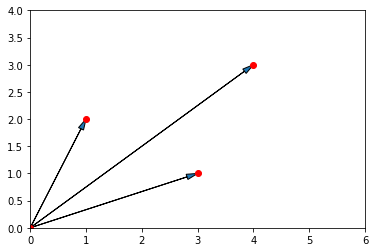

In [10]:
plt.plot(origin[0], origin[1], marker="o", markersize=6, color="red")
plt.plot(v1[0], v1[1], marker="o", markersize=6, color="red")
plt.plot(v2[0], v2[1], marker="o", markersize=6, color="red")
plt.plot(v3[0], v3[1], marker="o", markersize=6, color="red")
ax = plt.axes()
plot_vector_arrow(ax, origin, v1, arrow_head_width = 0.1, arrow_head_length = 0.2)
plot_vector_arrow(ax, origin, v2, arrow_head_width = 0.1, arrow_head_length = 0.2)
plot_vector_arrow(ax, origin, v3, arrow_head_width = 0.1, arrow_head_length = 0.2)
ax.set_xlim(xmin=0, xmax=6)
ax.set_ylim(ymin=0, ymax=4)
plt.show()

向量的长度对应的是平面上有向线段的长度

In [6]:
import math
def len_v(v):
    return math.sqrt(sum([x**2 for x in v]))

In [12]:
len_v(v1)

2.23606797749979

In [13]:
len_v(v2)

3.1622776601683795

In [14]:
len_v(v3)

5.0

两个向量的距离指的是平面上对应于两个向量的有向线段端点之间的距离，或者就是两个向量之差的长度

In [7]:
import math
def distance(v1, v2):
    return len_v(subtract_v(v1, v2))

In [8]:
distance(v1, v2)

8.0

In [17]:
from matplotlib import pyplot as plt
import math
v4 = subtract_v(v1, v2)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


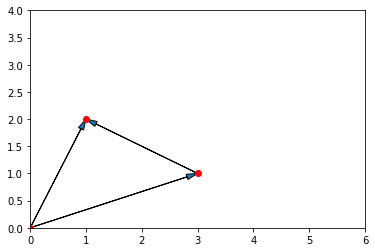

In [18]:
plt.plot(origin[0], origin[1], marker="o", markersize=6, color="red")
plt.plot(v1[0], v1[1], marker="o", markersize=6, color="red")
plt.plot(v2[0], v2[1], marker="o", markersize=6, color="red")
ax = plt.axes()
plot_vector_arrow(ax, origin, v1, arrow_head_width = 0.1, arrow_head_length = 0.2)
plot_vector_arrow(ax, origin, v2, arrow_head_width = 0.1, arrow_head_length = 0.2)
plot_vector_arrow(ax, v2, v1, arrow_head_width = 0.1, arrow_head_length = 0.2)
ax.set_xlim(xmin=0, xmax=6)
ax.set_ylim(ymin=0, ymax=4)
plt.show()

<strong>概率与统计</strong>
<br>
概率是用来刻画不确定事件的数学理论。在概率论里，事件的发生是由某个概率分布所确定的，譬如说一个银行的坏帐率是3%，指的是对于任一个贷款，假如没有其它先验知识的话，百分之三的可能性是坏帐。我们称贷款坏帐出现的事件是服从Bernoulli分布的，其参数 p = 3%

统计是用数据分析的方法来推算概率分布中的参数。如果我们有一组数据是由一个随机变量X产生的，那么我们可以根据这些数据来推测和X有关的一些参数的特性。如果数据是由两个变量X和Y共同产生的，我们可以不仅用这些数据来推测与X和Y有关的参数特性，而且可以推测X和Y是如何联系的。通过X和Y之间的关系可以帮助我们了解在将来如果有一个新的事件发生，给定X的值，我们可以来预测Y的值。所以统计和预测有着非常密切的关系。

概率和统计是机器学习基本的敲门砖。尤其是统计和机器学习有千丝万缕的关系。统计学习着重的是对数据背后的模型及参数进行推断，而对将来的预测则是模型的衍生产品。但机器学习注重的是预测，也就是怎么用过去的数据对将来进行更准确的预测。

我们下面来讲解一些基本的统计量及其Python程序的实现。

In [19]:
import math
#均值
def mean(v):
    return sum(v) / len(v)

#中位数
def median(v):
    v_sorted = sorted(v)
    mid_pos = int(len(v)/2)
    if len(v)%2 == 0:
        return (v_sorted[mid_pos-1]+v_sorted[mid_pos]) / 2
    else:
        return v_sorted[mid_pos]

#分位数
def quantile(v, p):
    v_sorted = sorted(v)
    pos = int(len(v)*p)
    return v_sorted[pos]

#方差
def variance(v):
    n = len(v)
    ave = mean(v)
    deviation = [x-ave for x in v]
    if n == 0:
        return 0
    else:
        return sum([x**2 for x in deviation]) / (n-1)

#标准差    
def std_dev(v):
    return math.sqrt(variance(v))

In [13]:
values=[1,2,3,1,4,7,4,8,11]
def quantile(v, p):
    v_sorted = sorted(v)
    pos = int(len(v)*p)
    return v_sorted[pos]
result=quantile(values,0.3)
result
print( sorted(values))

[1, 1, 2, 3, 4, 4, 7, 8, 11]


下面我们用Lending Club贷款者年收入的例子看一下这些统计量的计算。

In [15]:
import csv
with open('./loan_amnt_and_annual_inc_Q1_2017.csv', 'r') as f:
    reader = csv.reader(f)
    loan_and_income = list(reader)

In [21]:
loan_and_income[:10]

[['16000', '130000.0'],
 ['11875', '55000.0'],
 ['26000', '52000.0'],
 ['35000', '80000.0'],
 ['14000', '40000.0'],
 ['15000', '182000.0'],
 ['6000', '110000.0'],
 ['20000', '135000.0'],
 ['5000', '68000.0'],
 ['3600', '120000.0']]

In [18]:
loan = [float(x[0]) for x in loan_and_income]

In [23]:
loan[:10]

[16000.0,
 11875.0,
 26000.0,
 35000.0,
 14000.0,
 15000.0,
 6000.0,
 20000.0,
 5000.0,
 3600.0]

In [24]:
mean(loan)

14858.279947095962

In [25]:
median(loan)

12000.0

In [26]:
[quantile(loan, p) for p in [0.1, 0.25, 0.5, 0.75, 0.9]]

[4800.0, 7800.0, 12000.0, 20000.0, 30000.0]

In [27]:
std_dev(loan)

9396.273230845412

人们经常说正态分布的数据大部分都聚集在均值加减2倍的标准差之间，更精确的说就是在均值加减1.96倍标准差之间包含了95%的数据。也就是说2.5%的数据在均值加1.96倍的标准差之上，另外2.5%的数据在均值减1.96倍标准差之下

In [28]:
mean(loan) + 1.96 * std_dev(loan)

33274.97547955297

In [29]:
quantile(loan, 0.975)

35000.0

接下来我们来看一下年收入的统计量计算

In [30]:
income = [float(x[1]) for x in loan_and_income]

In [31]:
income[:10]

[130000.0,
 55000.0,
 52000.0,
 80000.0,
 40000.0,
 182000.0,
 110000.0,
 135000.0,
 68000.0,
 120000.0]

In [32]:
len(income)

96779

In [33]:
mean(income)

82761.03709389438

In [34]:
median(income)

70000.0

In [35]:
[quantile(income, p) for p in [0.1, 0.25, 0.5, 0.75, 0.9]]

[35000.0, 49000.0, 70000.0, 99500.0, 140000.0]

In [36]:
std_dev(income)

214944.1953208528

In [37]:
mean(income) + 1.96 * std_dev(income)

504051.65992276586

In [38]:
quantile(income, 0.975)

215000.0

看来在这儿这条经验规则不成立了。这是为什么呢？
我们下面将贷款数额和年收入的直方图画出来，看一看究竟发生了什么。直方图就是将数据从小到大排列，然后用图的方式将数据在每个区间的频率画出来。直方图可以帮助我们非常有效地了解数据的分布。

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
import math

def bucketize(point, bucket_size):
    return bucket_size * math.floor(point / bucket_size)#对数据做规范化，都统一到一定的值

def make_histogram(points, bucket_size):
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [21]:
min(loan)

1000.0

In [22]:
math.floor(1000/5000)*5000

0

<BarContainer object of 1465 artists>

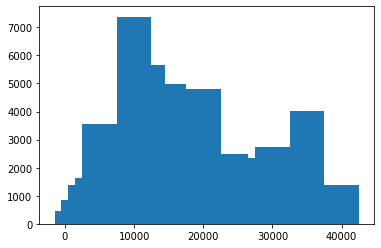

In [23]:
result=Counter(loan)
plt.bar(result.keys(), result.values(), width=5000)

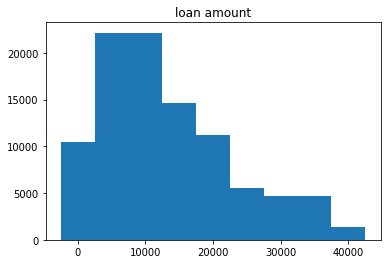

In [20]:
plot_histogram(loan, 5000, "loan amount")

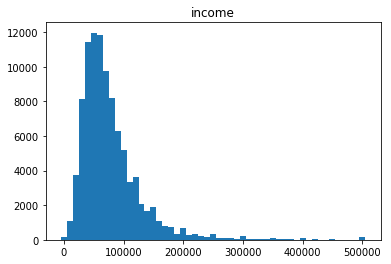

In [41]:
income2 = [x if x<500000 else 500000 for x in income]
plot_histogram(income2, 10000, "income")

大家可以看到loan amount大致是正态分布，但是income的分布有很长的尾巴，不是一个标准的正态分布。在统计中如果碰到这种情况，我们往往用对数转换这个技巧来将数据正态化。请看下图。

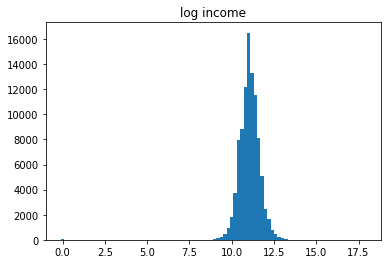

In [42]:
import math
log_income = [math.log(x+1) for x in income]
plot_histogram(log_income, 0.2, "log income")

这是一个非常好的正态分布。在这个前提下，我们再来验证一下两倍标准差的经验规则。

In [43]:
mean(log_income)

11.144032933485372

In [44]:
std_dev(log_income)

0.5954855440135217

In [45]:
mean(log_income) + 1.96 * std_dev(log_income)

12.311184599751874

In [46]:
quantile(log_income, 0.975)

12.278397958261774

In [47]:
mean(log_income) - 1.96 * std_dev(log_income)

9.97688126721887

In [48]:
quantile(log_income, 0.025)

10.085850775128717

<strong>相关系数</strong>
<br>
上面介绍了一组数据的统计量，如果牵涉到两组数据的话，那么相关系数是一个非常重要的概念。相关系数表示的是两组数据的关联性，它总是在-1到1之间。如果相关系数是正数的话，那么当一组数据增大时，另外一组数据也增大。如果相关系数是负数的话，那么当一组数据增大时，另外一组数据会减少。下面是相关系数的Python实现。

In [49]:
def covariance(v1, v2): 
    n = len(v1)
    mean1 = mean(v1)
    mean2 = mean(v2)
    deviation1 = [x-mean1 for x in v1]
    deviation2 = [x-mean2 for x in v2]
    return dot(deviation1, deviation2) / (n - 1)

def correlation(v1, v2):
    std1 = std_dev(v1)
    std2 = std_dev(v2)
    if std1 > 0 and std2 > 0:
        return covariance(v1, v2) / (std1 * std2) 
    else:
        return 0 

In [50]:
correlation(loan, income)

0.11887894419031371

<strong>最优化</strong>
<br>
最优化是解决机器学习问题的一个重要工具。机器学习问题往往可以把它表示成一个求解损失函数最小值或者是求似然函数最大值的问题。
我们先来对一个光滑的函数f(x), 讲解一下如何求它的最小值。这儿涉及到梯度的概念，所谓梯度，就是由$f(x)$对每一个自变量求导之后所构成的一个向量。如果$f(x)$只含一个自变量的话，那么$f(x)$的梯度就是它的导数。梯度往往用$\nabla$表示。下面是几个例子：
<br><br>
$$f(x)=x^2,\  \nabla f=2x$$
<br>
$$f(x_1,x_2) = \frac{x_1}{x_2},\  \nabla f=[\frac{1}{x_2}, \ -\frac{x_1}{x_2^2}]$$
<br>
梯度有一个非常重要的性质，就是所谓的梯度下降法。从函数上的任一个点出发，朝着梯度的反方向走一小步，那么函数的值会变小。
<br>
<div>
    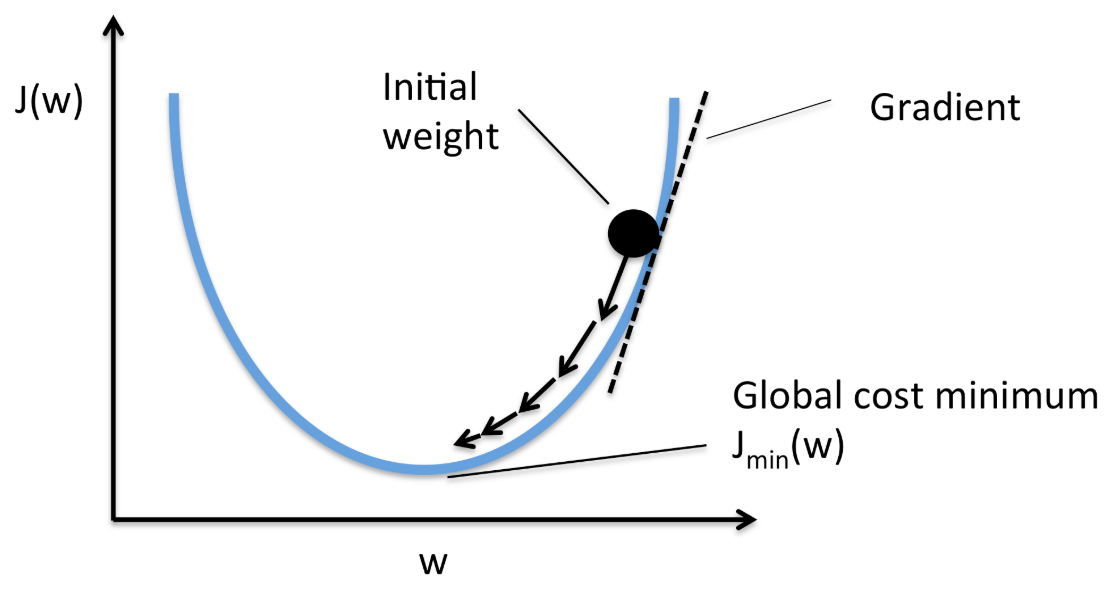
</div>
<br>

这个简单的思想构成了解决优化问题的关键所在。我们可以从任何一个初始点出发，求出在这一点的梯度方向，然后朝着它的反方向走一小步，如果在新的点上的函数值比原先点的值来的小，那么我们就在新的点上再求梯度，把整个步骤继续下去。如果在新的点上的函数值比原先点的值来的大，这说明走的这一步太大了，那我们可以把这一步的步长减小一些，再看看新的点的函数值是否变小。这一个朴素的思想几乎是解决所有机器问题的关键所在。下面是对函数$f(x)$最小化的程序实现。

In [51]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [52]:
def step(v, direction, step_size):
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

In [53]:
def minimize_target(target, gradient, initial, tolerance=0.0001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    par = initial
    target = safe(target)
    target_value = target(par)
    iteration=0

    while True:
        iteration = iteration + 1
        print("iteration = ", iteration)
        grad = gradient(par)
        next_par = [step(par, grad, -step_size) for step_size in step_sizes]
        next_par = min(next_par, key=target)
        next_target_value = target(next_par)
            
        if abs(target_value - next_target_value) < tolerance: 
            return par
        else:
            par, target_value = next_par, next_target_value
            print("parameters: ", par, " target value: ", target_value)

现在我们用Lending Club的贷款数额和年收入的数据来说明如何用梯度下降法来拟合一个线性回归模型。所谓线性回归模型就是用一个线性方程来描述自变量和应变量的关系。对于贷款数额和年收入而言，我们是否可以写出下面的线性方程呢？
<br><br>
$$Loan \ Amount = a*Income + b$$
<br>
给定贷款数额和年收入的数据，我们怎么来求出$a$和$b$呢？ 或者一般而言，对于下面这组数据，
<br><br>
$$(x_1,\ y_1),\ (x_2,\ y_2),\ ... (x_n,\ y_n)$$
<br>
我们怎样找出一个线性方程$y=a*x + b$可以最佳地拟合这组数据

In [54]:
from functools import partial
def error(par, x, y):
    a = par[0]
    b = par[1]
    return sum([(a*xi+b-yi)**2 for xi, yi in zip(x, y)])
def grad_error(par, x, y):
    a = par[0]
    b = par[1]
    grad_a = sum([(a*xi+b-yi)*2*xi for xi, yi in zip(x, y)])
    grad_b = sum([(a*xi+b-yi)*2 for xi, yi in zip(x, y)])
    return [grad_a, grad_b]

给定贷款数额 ($y$)  和年收入 ($x$) 的数据，上面的error和grad_error就是参数par的函数。在我们使用最优化minimize_target程序前，我们还要做一个处理，这就是对数据$x$和$y$做尺度变换，也就是对数据中的每一个变量，对每一个样本，减去这个变量的均值，再除以它的标准差。这可以使每个变量做了处理后，它的均值是0，标准差是1，所以这个变换有时也称为0-1标准化，这对于很多最有化问题的数值稳定性是至关重要的。

In [55]:
def scale(v):
    ave = mean(v)
    std = std_dev(v)
    return [(x-ave)/std for x in v]

In [56]:
loss = partial(error, x=scale(income), y=scale(loan))
grad_loss = partial(grad_error, x=scale(income), y=scale(loan))
a, b = minimize_target(loss, grad_loss, [0, 0])

iteration =  1
parameters:  [0.2300973292169986, -4.1539494066711317e-16]  target value:  96607.41191591934
iteration =  2
parameters:  [0.014827471894759137, 2.7818469749973934e-16]  target value:  96458.10085475794
iteration =  3
parameters:  [0.21622533961114584, -7.718936601008864e-16]  target value:  96327.41298694925
iteration =  4
parameters:  [0.027805550490427294, 4.4134029764109086e-16]  target value:  96213.02548839364
iteration =  5
parameters:  [0.2040835684001833, -5.081038367826807e-16]  target value:  96112.90525500452
iteration =  6
parameters:  [0.039164905964543695, 2.8742758173549987e-16]  target value:  96025.27276667123
iteration =  7
parameters:  [0.193456209792823, -4.050215718365281e-16]  target value:  95948.57045833013
iteration =  8
parameters:  [0.04910743758323807, 5.35487210129304e-16]  target value:  95881.4350361069
iteration =  9
parameters:  [0.18415437491162973, -4.535666286997754e-16]  target value:  95822.67324634767
iteration =  10
parameters:  [0

parameters:  [0.1195830235623336, 3.411845805878507e-16]  target value:  95410.36159763992
iteration =  78
parameters:  [0.11822023569303848, -4.545377962905655e-16]  target value:  95410.35561377631
iteration =  79
parameters:  [0.11949520551203521, 2.9556190828117293e-16]  target value:  95410.35037626278
iteration =  80
parameters:  [0.11830239474817619, -4.055336622066357e-16]  target value:  95410.34579200903
iteration =  81
parameters:  [0.11941834078640601, -3.2020219808969626e-17]  target value:  95410.341779538
iteration =  82
parameters:  [0.11837430631087922, -4.11030653957311e-16]  target value:  95410.33826752844
iteration =  83
parameters:  [0.11935106320480664, 2.6580626588668183e-16]  target value:  95410.33519356619
iteration =  84
parameters:  [0.11843724852512899, -6.334871516244783e-16]  target value:  95410.33250301713
iteration =  85
parameters:  [0.11929217698684338, 5.892816790087358e-16]  target value:  95410.33014804478
iteration =  86
parameters:  [0.11849234

In [57]:
print(a, b)

0.11878964600730355 1.4064832631888204e-16


请注意这儿(a,b)是在标准化转换后的坐标下的参数值，我们可以用下面的程序将其还原成在原尺度下的参数值。

In [58]:
mean_x, sd_x, mean_y, sd_y = mean(income), std_dev(income), mean(loan), std_dev(loan)

In [59]:
coef = a*sd_y/sd_x
print("coefficient for income: ", coef)

coefficient for income:  0.00519288259547497


In [60]:
intercept = b*sd_y - a*mean_x*sd_y/sd_x+mean_y
print("intercept: ", intercept)

intercept:  14428.511597987621


In [61]:
import random
random.seed(100)
index = random.sample(range(len(income)), 50)
income_sample = [income[x] for x in index]
loan_sample = [loan[x] for x in index]

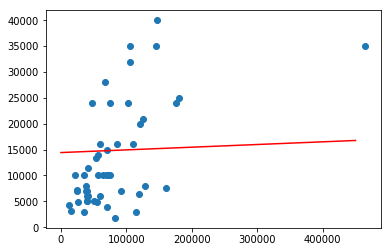

In [62]:
from matplotlib import pyplot as plt
plt.scatter(income_sample, loan_sample)
points_x = [x*10000 for x in range(int(max(income_sample)/10000))]
points_y = [coef*x + intercept for x in points_x]
plt.plot(points_x, points_y, '-r')
plt.show()

从上图看，income和loan amount之间拟合的并不好，这是因为income和loan amount之间没有很紧密的关系吗？ 让我们使用对数转换这个技巧，建立log(income)和income之间的线性方程。

In [63]:
loss = partial(error, x=scale(log_income), y=scale(loan))
grad_loss = partial(grad_error, x=scale(log_income), y=scale(loan))
a, b = minimize_target(loss, grad_loss, [0, 0])

iteration =  1
parameters:  [0.9176028139478778, -4.1539494066711317e-16]  target value:  94065.0923543657
iteration =  2
parameters:  [0.059130325330668754, 7.503173173328826e-12]  target value:  91690.55886018947
iteration =  3
parameters:  [0.8622828467815298, -6.536764513564997e-12]  target value:  89612.19496011693
iteration =  4
parameters:  [0.11088547381280434, 1.3166352366700273e-11]  target value:  87793.06016512211
iteration =  5
parameters:  [0.8138628000675838, -1.1411919713655297e-11]  target value:  86200.82148052659
iteration =  6
parameters:  [0.15618533271649693, 1.733139072479517e-11]  target value:  84807.17872481549
iteration =  7
parameters:  [0.7714820640715979, -1.4937828445305008e-11]  target value:  83587.36152695835
iteration =  8
parameters:  [0.1958350540849334, 2.028361343775486e-11]  target value:  82519.68906205658
iteration =  9
parameters:  [0.7343873707481848, -1.737592419281953e-11]  target value:  81585.18470000538
iteration =  10
parameters:  [0.23

parameters:  [0.47688393122419726, 1.237650593122458e-13]  target value:  75028.08295362408
iteration =  78
parameters:  [0.47144928325169566, 3.7833764643391545e-12]  target value:  75027.98779057115
iteration =  79
parameters:  [0.4765337225088502, 3.148406346742669e-13]  target value:  75027.9044969623
iteration =  80
parameters:  [0.47177692451742853, 3.6021661886654054e-12]  target value:  75027.83159236185
iteration =  81
parameters:  [0.4762271944462809, 4.872345249485031e-13]  target value:  75027.76778096719
iteration =  82
parameters:  [0.4720636999116422, 3.4380262781130978e-12]  target value:  75027.71192860084
iteration =  83
parameters:  [0.47595889885846837, 6.430809229574219e-13]  target value:  75027.66304257009
iteration =  84
parameters:  [0.47231470653177504, 3.2899792901109052e-12]  target value:  75027.62025396686
iteration =  85
parameters:  [0.47572406710493986, 7.838462734444376e-13]  target value:  75027.58280227888
iteration =  86
parameters:  [0.472534405727

In [71]:
print(a, b)

0.47416406074824313 1.903616336784734e-12


In [72]:
mean_x, sd_x, mean_y, sd_y = mean(log_income), std_dev(log_income), mean(loan), std_dev(loan)

In [73]:
coef = a*sd_y/sd_x
print("coefficient for income: ", coef)

coefficient for income:  7481.919780972058


In [74]:
intercept = b*sd_y - a*mean_x*sd_y/sd_x+mean_y
print("intercept: ", intercept)

intercept:  -68520.48049773443


In [75]:
import random
random.seed(100)
index = random.sample(range(len(log_income)), 50)
income_sample = [log_income[x] for x in index]
loan_sample = [loan[x] for x in index]

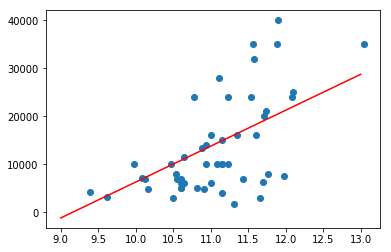

In [70]:
from matplotlib import pyplot as plt
plt.scatter(income_sample, loan_sample)
points_x = [x for x in range(int(min(income_sample)), int(max(income_sample))+1)]
points_y = [coef*x + intercept for x in points_x]
plt.plot(points_x, points_y, "-r")
plt.show()

<strong>随机梯度下降法</strong>
<br>
上面描述的梯度下降法是求解几乎所有机器学习的最重要的算法，尤其是现在非常流行的大规模深度学习，几乎依赖于基于梯度下降的各种算法。但是标准的梯度下降法计算量非常大，因为对于样本集内的所有样本，梯度法要扫描一遍，然后才能计算出在当前参数下需要被优化函数的值和它的梯度，如果要让最后的结果收敛到最优点，梯度法要扫描这个样本集很多遍，所以如果我们的数据样本非常大的话，那么梯度法是非常费时的。

为了提高梯度法的计算效率，人们发明了一种简易梯度法，我们叫它随机梯度下降法。它的原理非常简单，也就是对要求解的最优函数，在当前的参数下，在某一个样本点上计算出这个函数的值和它的梯度，然后参数沿着梯度的反方向走一小步，走到一个新的参数，然后我们选择下一个样本点，再重复上面的步骤。随机梯度法和标准梯度法的最大区别是在随机梯度法里，优化函数的值和它的梯度是依次在每个样本点上计算，而在标准梯度法里，优化函数和梯度的计算是同时在所有样本点上进行，让后把它们的值叠加起来。

下面我们来看一下随机梯度法的Python实现。

In [ ]:
import random
def random_order(data):
    indexes = [i for i, _ in enumerate(data)] 
    random.shuffle(indexes)
    for i in indexes: 
        yield data[i]

In [ ]:
def SGD(target, gradient, x, y, initial, alpha_0=0.01):
    data = list(zip(x, y))
    par = initial
    alpha = alpha_0
    min_par, min_target_value = None, float("inf")
    iterations_with_no_improvement = 0
    while iterations_with_no_improvement < 100:
        target_value = sum( target(xi, yi, par) for xi, yi in data )
        if target_value < min_target_value:
            min_par, min_target_value = par, target_value 
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9
        print("iterations_with_no_improvement: ", iterations_with_no_improvement)
        print("min par: ", min_par, " min target value: ", min_target_value)
        for xi, yi in random_order(data):
            grad_i = gradient(xi, yi, par)
            par = subtract_v(par, multiply_v(grad_i, alpha))
    
    return min_par

In [ ]:
def loss_i(xi, yi, par):
    a = par[0]
    b = par[1]
    return (a*xi+b-yi)**2 
def grad_loss_i(xi, yi, par):
    a = par[0]
    b = par[1]
    grad_a = (a*xi+b-yi)*2*xi 
    grad_b = (a*xi+b-yi)*2 
    return [grad_a, grad_b]

In [ ]:
random.seed(5)
a, b = SGD(loss_i, grad_loss_i, scale(log_income), scale(loan), initial=[0, 0], alpha_0=0.005)

In [ ]:
print(a, b)